# 2. Limpieza de datos

In [933]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind, f_oneway, chi2_contingency, chisquare, anderson, kstest, shapiro, norm, jarque_bera
import scipy.stats as stats
import os

In [934]:
df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [935]:
# Creación de dos variables para separar las variables númericas y las categóricas
variables_numericas = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
df_numericas = df[variables_numericas]

variables_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
df_categoricas = df[variables_categoricas]

## **<u> Limpieza de valores missing </u>**

In [936]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [937]:
# Buscar valores nulos
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## **<u> Limpieza de valores outlier </u>**

Método IQR

El método IQR es una técnica que permite detectar valores atípicos en un conjunto de datos. El IQR se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) y se calcula con la fórmula:

$ IQR = Q3 - Q1 $

Este rango representa la dispersión de la mitad central de los datos. Los valores atípicos se consideran aquellos puntos que se encuentran fuera del rango definido por:

$ Q1 - 1.5 * IQR $

$ Q3 + 1.5 * IQR $

Estos valores extremos pueden distorsionar los resultados del análisis, por lo que es fundamental identificarlos y tratarlos adecuadamente.

In [938]:
# Función para identificar outliers con el método del rango intercuartilico

def identificar_outliers(df, col_categorica, col_cuantitativa):
  outliers = pd.DataFrame() 
  
  for categoria in df[col_categorica].unique(): 
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa] 
    Q1 = data_categoria.quantile(0.25) 
    Q3 = data_categoria.quantile(0.75) 
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR 
    limite_superior = Q3 + 1.5 * IQR 
    outliers_categoria = data_categoria[(data_categoria < limite_inferior) | (data_categoria > limite_superior)] 
    outliers = pd.concat([outliers, outliers_categoria]) 
  return outliers 

# Identificar outliers en la variable 'Absences'
outliers = identificar_outliers(df, 'GPA', 'Absences') 
print(f"Outliers identificados:\n{outliers}")

Outliers identificados:
      Absences
1278       3.0
474       24.0


In [939]:
indices_outliers = outliers.index
df_limpio = df.drop(indices_outliers)

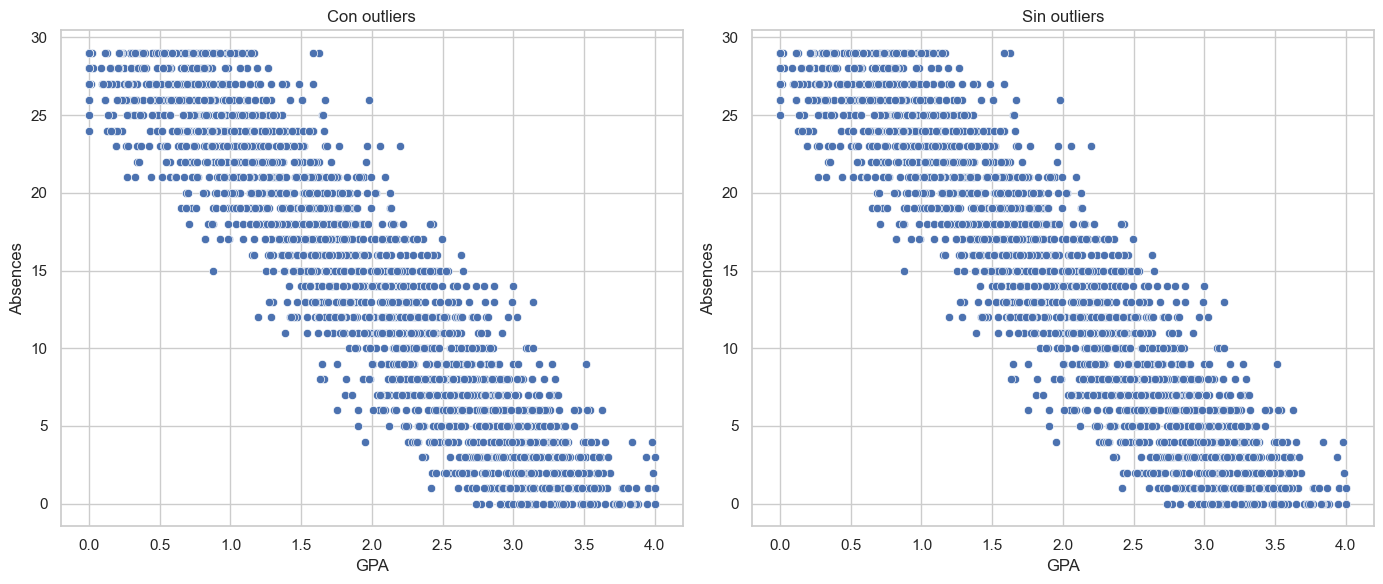

In [940]:
# Comparación de los datos antes y después de eliminar los valores outlier
plt.figure(figsize=(14, 6))

# Antes de eliminar outliers
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='GPA', y='Absences')
plt.title('Con outliers')
plt.xlabel('GPA')
plt.ylabel('Absences')

# Después de eliminar outliers
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_limpio, x='GPA', y='Absences')
plt.title('Sin outliers')
plt.xlabel('GPA')
plt.ylabel('Absences')

plt.tight_layout()
plt.show()

### **<u> Correlación con GPA </u>**

In [941]:
df = df_limpio

In [942]:
# Spearman para GPA con variables numéricas

df_numericas_limpio = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

spearman_results = {}
for column in df_numericas_limpio.columns.drop('GPA'):
    corr, p_value = spearmanr(df_numericas_limpio[column], df_numericas_limpio['GPA']) # Calcular la correlación de Spearman y el valor p
    
    spearman_results[column] = (corr, p_value) # Almacenar los resultados en el diccionario

print("Resultados de la correlación de Spearman para 'GPA':\n")
for column, (corr, p_value) in spearman_results.items():
    print(f"Variable: {column}")
    print(f"Correlación Spearman: {corr}")
    print(f"p_value: {p_value}\n")

Resultados de la correlación de Spearman para 'GPA':

Variable: Age
Correlación Spearman: -0.0007811419285089512
p_value: 0.9695535729299833

Variable: StudyTimeWeekly
Correlación Spearman: 0.16723155830266612
p_value: 1.8832418500568646e-16

Variable: Absences
Correlación Spearman: -0.9254425567382787
p_value: 0.0



In [943]:
# t de Student para GPA con variables categoricas dicotómicas

# Variables dicotómicas
dicotomicas = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Resultados de la prueba t
t_test_results = {}
for var in dicotomicas:
    # Dividir los datos en dos grupos según la variable categórica
    group1 = df[df[var] == 0]['GPA']
    group2 = df[df[var] == 1]['GPA']
    
    # Realizar la prueba t de Student
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # equal_var=False para usar la corrección de Welch
    t_test_results[var] = (t_stat, p_value)

print("Resultados de t de Student para 'GPA':\n")
for var, (t_stat, p_value) in t_test_results.items():
    print(f"Variable: {var}")
    print(f"t_stat: {t_stat}")
    print(f"p_value: {p_value}\n")

Resultados de t de Student para 'GPA':

Variable: Gender
t_stat: 0.6586050643647331
p_value: 0.5102130158307148

Variable: Tutoring
t_stat: -7.089852918712961
p_value: 2.146456798228511e-12

Variable: Extracurricular
t_stat: -4.525088533470022
p_value: 6.405379173569662e-06

Variable: Sports
t_stat: -2.7592727847170404
p_value: 0.005868436391418451

Variable: Music
t_stat: -3.600974948366449
p_value: 0.00033885135611002264

Variable: Volunteering
t_stat: -0.16300489623025563
p_value: 0.8705767747896509



In [944]:
# ANOVA para GPA con variables categoricas politómicas

# Variables politómicas
politomicas = ['Ethnicity', 'ParentalEducation', 'ParentalSupport']

# Resultados de ANOVA
anova_results = {}
for var in politomicas:
    # Agrupar los datos por la variable categórica y obtener listas de GPA para cada grupo
    grouped = [group['GPA'].values for name, group in df.groupby(var)]
    
    # Realizar la prueba ANOVA
    f_stat, p_value = f_oneway(*grouped)
    anova_results[var] = (f_stat, p_value)

print("Resultados de ANOVA para 'GPA':\n")
for var, (f_stat, p_value) in anova_results.items():
    print(f"Variable: {var}")
    print(f"f_stat: {f_stat}")
    print(f"p_value: {p_value}\n")

Resultados de ANOVA para 'GPA':

Variable: Ethnicity
f_stat: 1.0788010040145408
p_value: 0.3568083754129734

Variable: ParentalEducation
f_stat: 1.8115652161117606
p_value: 0.1238180451205767

Variable: ParentalSupport
f_stat: 22.2207277234677
p_value: 4.9225431976956884e-18



### **<u> Correlación con GradeClass </u>**

In [945]:
# ANOVA para cada variable numérica respecto a 'GradeClass'
anova_results = {}
for var in variables_numericas:
    if var != 'GradeClass':
        groups = [df[df['GradeClass'] == grade][var] for grade in df['GradeClass'].unique()]
        anova_results[var] = stats.f_oneway(*groups)

print("Resultados de ANOVA para 'GradeClass':\n")
for var, result in anova_results.items():
    print(f"Variable: {var}")
    print(f"f_stat: {result.statistic}")
    print(f"p_value: {result.pvalue}\n")

Resultados de ANOVA para 'GradeClass':

Variable: Age
f_stat: 0.17754656760787532
p_value: 0.9500429357783025

Variable: StudyTimeWeekly
f_stat: 10.937100069610818
p_value: 8.670276874395115e-09

Variable: Absences
f_stat: 900.8083962294847
p_value: 0.0

Variable: GPA
f_stat: 1172.7546043423656
p_value: 0.0



In [946]:
# La prueba de independencia Chi-cuadrado evalua si hay una asociacion significativa entre dos variables categoricas

# Chi-cuadrado para cada variable categórica respecto a 'GradeClass'
chi2_results = {}
for var in variables_categoricas:
    contingency_table = pd.crosstab(df_categoricas[var], df['GradeClass'])
    chi2_results[var] = chi2_contingency(contingency_table)

# Mostrar resultados de Chi-cuadrado
print("Resultados de Chi-cuadrado para 'GradeClass':\n")
for var, result in chi2_results.items():
    chi2, p, dof, ex = result
    print(f"Variable: {var}")
    print(f"Chi2: {chi2}")
    print(f"p_value: {p}\n")

Resultados de Chi-cuadrado para 'GradeClass':

Variable: Gender
Chi2: 2.1108360892943536
p_value: 0.7153818740122861

Variable: Ethnicity
Chi2: 8.294863527730712
p_value: 0.7616841577311895

Variable: ParentalEducation
Chi2: 14.623987505787447
p_value: 0.5523310881510879

Variable: Tutoring
Chi2: 36.631153219970074
p_value: 2.1456250093964676e-07

Variable: ParentalSupport
Chi2: 72.77392091881268
p_value: 3.243978576891362e-09

Variable: Extracurricular
Chi2: 13.550420021150373
p_value: 0.00887719596218409

Variable: Sports
Chi2: 4.043746956343678
p_value: 0.40011771722139045

Variable: Music
Chi2: 7.862028463225853
p_value: 0.09676503697451311

Variable: Volunteering
Chi2: 1.4623110459223931
p_value: 0.8332959606067465



#### **<u> Resultados para 'GPA' </u>**

**Resumen de la correlación de Spearman**
* Significativo: StudyTimeWeekly, Absences
* No significativo:  Age

**Resumen de la t de Student**
* Significativo (p < 0.05): Tutoring, Extracurricular, Sports, Music
* No significativo (p ≥ 0.05): Gender, Volunteering

**Resumen de la prueba ANOVA**
* Significativo (p < 0.05): ParentalSupport
* No significativo (p ≥ 0.05): Ethnicity, ParentalEducation

**Resultado**
* Número de variables independientes con relación significativa con 'GPA': 7
* StudyTimeWeekly, Absences, Tutoring, Extracurricular, Sports, Music, ParentalSupport

#### **<u> Resultados para 'GradeClass' </u>**

**Resumen de la prueba ANOVA**
* Significativo (p < 0.05): StudyTimeWeekly, Absences
* No significativo (p ≥ 0.05): Age

**Resumen de la prueba chi-cuadrado**
* Significativo (p < 0.05): Tutoring, ParentalSupport, Extracurricular
* No significativo (p ≥ 0.05): Gender, Ethnicity, ParentalEducation, Sports, Music, Volunteering

**Resultado**
* Número de variables independientes con relación significativa con 'GradeClass': 5
* StudyTimeWeekly, Absences, Tutoring, Extracurricular, ParentalSupport

## **<u> Elección de la variable objetivo </u>**

Dado que hay más variables independientes con una relación significativa con la variable objetivo 'GPA' en comparación con 'GradeClass', se optará por usar 'GPA' para el análisis de datos y la construcción de modelos de Machine Learning. Esto de debe a que se espera que los modelos basados en 'GPA' proporcionen resultados más significativos y útiles.

## **<u> Determinación de la distribución de las variables </u>**

1. Aproximación visual

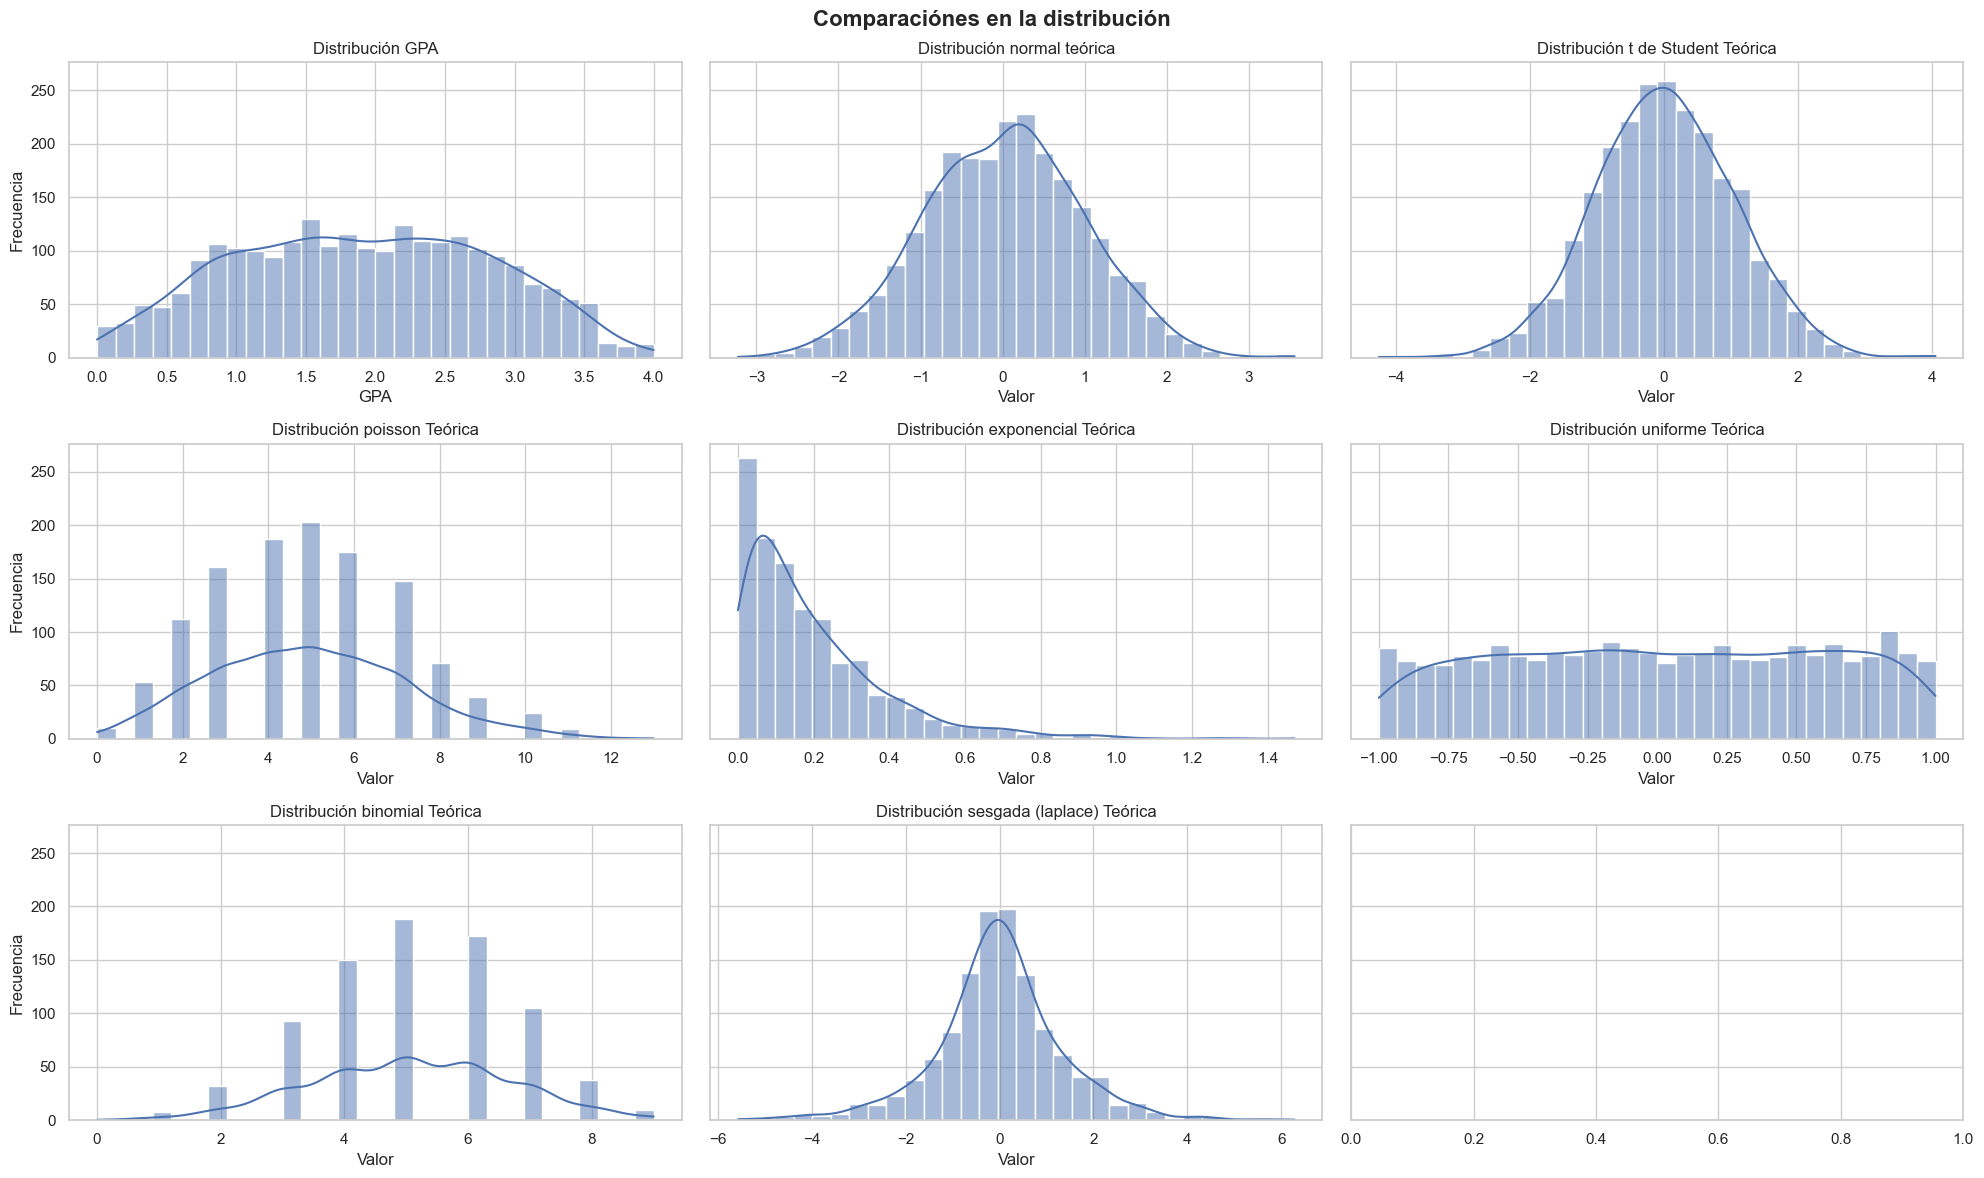

In [947]:
# Generación de gráficos de distribución teórica para comparar visualmente con nuestra variable

tamaño_muestra = len(df['GPA'])  # Tamaño de la muestra de datos generados

# Parámetros de la distribución normal
media = 0  # Media de la distribución normal
desviacion_estandar = 1  # Desviación estándar de la distribución normal
datos_normales = norm.rvs(loc=media, scale=desviacion_estandar, size=tamaño_muestra)

# Parámetros de la distribución T de Student
grados_libertad = 30  # Grados de libertad
datos_t_student = np.random.default_rng().standard_t(df=grados_libertad, size=tamaño_muestra)

# Parámetros de la distribución de Poisson
lambda_poisson = 5  # Promedio de eventos por intervalo
datos_poisson = np.random.poisson(lam=lambda_poisson, size=round(tamaño_muestra/2))

# Parámetros de la distribución exponencial
escala_exponencial = 1 / 5  # Inverso de la tasa media de eventos
datos_exponencial = np.random.exponential(scale=escala_exponencial, size=round(tamaño_muestra/2))

# Parámetros de la distribución uniforme
datos_uniforme = np.random.uniform(low=-1, high=1, size=tamaño_muestra)

# Parámetros de la distribución binomial
datos_binomial = np.random.binomial(n=10, p=0.5, size=round(tamaño_muestra/3))

# Parámetros de la distribución Laplace
loc = 0  # Media de la distribución
scale = 1  # Escala de la distribución
datos_sesgada = np.random.laplace(loc, scale, size=round(tamaño_muestra/2))

# Generar los gráficos comparativos
fig, ax = plt.subplots(3, 3, figsize=(20,12), sharey=True)
fig.suptitle('Comparaciónes en la distribución', fontweight='bold', fontsize=16)

# Datos originales de GPA
sns.histplot(df['GPA'], bins=30, kde=True, label='Datos Originales', ax=ax[0,0])
ax[0,0].set_title('Distribución GPA')
ax[0,0].set_xlabel('GPA')
ax[0,0].set_ylabel('Frecuencia')

# Distribución normal
sns.histplot(datos_normales, bins=30, kde=True, label='Datos Normales', ax=ax[0,1])
ax[0,1].set_title('Distribución normal teórica')
ax[0,1].set_xlabel('Valor')
ax[0,1].set_ylabel('Frecuencia')

# Distribución t de Student
sns.histplot(datos_t_student, bins=30, kde=True, label='Datos t-Student', ax=ax[0,2])
ax[0,2].set_title('Distribución t de Student Teórica')
ax[0,2].set_xlabel('Valor')
ax[0,2].set_ylabel('Frecuencia')

# Distribución de Poisson
sns.histplot(datos_poisson, bins=30, kde=True, label='Datos Poisson', ax=ax[1,0])
ax[1,0].set_title('Distribución poisson Teórica')
ax[1,0].set_xlabel('Valor')
ax[1,0].set_ylabel('Frecuencia')

# Distribución exponencial
sns.histplot(datos_exponencial, bins=30, kde=True, label='Datos Exponencial', ax=ax[1,1])
ax[1,1].set_title('Distribución exponencial Teórica')
ax[1,1].set_xlabel('Valor')
ax[1,1].set_ylabel('Frecuencia')

# Distribución uniforme
sns.histplot(datos_uniforme, bins=30, kde=True, label='Datos uniforme', ax=ax[1,2])
ax[1,2].set_title('Distribución uniforme Teórica')
ax[1,2].set_xlabel('Valor')
ax[1,2].set_ylabel('Frecuencia')

# Distribución binomial
sns.histplot(datos_binomial, bins=30, kde=True, label='Datos binomial', ax=ax[2,0])
ax[2,0].set_title('Distribución binomial Teórica')
ax[2,0].set_xlabel('Valor')
ax[2,0].set_ylabel('Frecuencia')

# Distribución sesgada (laplace)
sns.histplot(datos_sesgada, bins=30, kde=True, label='Datos sesgada (laplace)', ax=ax[2,1])
ax[2,1].set_title('Distribución sesgada (laplace) Teórica')
ax[2,1].set_xlabel('Valor')
ax[2,1].set_ylabel('Frecuencia')

dir = str(f'./graph/EDA/')
os.makedirs(dir, exist_ok=True)
file = str(f'Comparciónes en la distribución.png')
plt.savefig(dir + file)

plt.tight_layout()
plt.show()

2. Test de distribución normal

In [948]:
# Hacer test de Shapiro-Wilk, Kolmogorov-Smirnov y Jarque-Bera para determinar si las variables numericas siguen una distribución normal

resultados_tests = {}

for var in df_numericas.columns:
    shapiro_test = shapiro(df_numericas[var])
    kstest_test = kstest(df_numericas[var], 'norm', args=(df_numericas[var].mean(), df_numericas[var].std()))
    jarque_bera_test = jarque_bera(df_numericas[var])
    
    resultados_tests[var] = {
        'Shapiro-Wilk': shapiro_test,
        'Kolmogorov-Smirnov': kstest_test,
        'Jarque-Bera': jarque_bera_test
    }

# Display the results
for key, value in resultados_tests.items():
    print(f"{key}:\n Shapiro-Wilk: {value['Shapiro-Wilk']}\n Kolmogorov-Smirnov: {value['Kolmogorov-Smirnov']}\n Jarque-Bera: {value['Jarque-Bera']}\n")

Age:
 Shapiro-Wilk: ShapiroResult(statistic=0.854282164501672, pvalue=1.8113924197582663e-42)
 Kolmogorov-Smirnov: KstestResult(statistic=0.17295543805612423, pvalue=4.853814936940226e-63, statistic_location=16, statistic_sign=1)
 Jarque-Bera: SignificanceResult(statistic=188.0500638886481, pvalue=1.4636844730415936e-41)

StudyTimeWeekly:
 Shapiro-Wilk: ShapiroResult(statistic=0.959990052063945, pvalue=3.5935060266820793e-25)
 Kolmogorov-Smirnov: KstestResult(statistic=0.05509684780186247, pvalue=9.425383679014307e-07, statistic_location=5.825874944110105, statistic_sign=1)
 Jarque-Bera: SignificanceResult(statistic=129.5761194111116, pvalue=7.292949002194292e-29)

Absences:
 Shapiro-Wilk: ShapiroResult(statistic=0.9556810349498003, pvalue=2.2840697519084094e-26)
 Kolmogorov-Smirnov: KstestResult(statistic=0.07985075923465867, pvalue=1.0298545804585291e-13, statistic_location=8, statistic_sign=1)
 Jarque-Bera: SignificanceResult(statistic=138.1707272250405, pvalue=9.922196025098903e-31

Los tres tests aplicados (Shapiro-Wilk, Kolmogorov-Smirnov y Jarque-Bera) nos permiten evaluar si una muestra de datos sigue una distribución normal.

1. Prueba de Shapiro-Wilk
* Propósito: Test para la normalidad. Verifica si una muestra proviene de una distribución normal.
* Interpretación: Si el valor p es menor que un nivel de significancia típico (p < 0.05), se rechaza la hipótesis nula de que los datos provienen de una distribución normal.

2. Prueba de Kolmogorov-Smirnov (K-S)
* Propósito: Compara la muestra con una distribución de referencia (aquí, la distribución normal).
* Interpretación: Si el valor p es menor que un nivel de significancia típico (p < 0.05), se rechaza la hipótesis nula de que los datos siguen la distribución de referencia (normal).

3. Prueba de Jarque-Bera
* Propósito: Test de normalidad basado en la asimetría y curtosis.
* Interpretación: Si el valor p es menor que un nivel de significancia típico (p < 0.05), se rechaza la hipótesis nula de que los datos tienen una distribución normal.

Para cada variable, si el valor p de los tres tests es menor que 0.05, se concluye que la variable no sigue una distribución normal.

Age
* Shapiro-Wilk: p-value = 5.11e-42
* Kolmogorov-Smirnov: p-value = 6.32e-61
* Jarque-Bera: p-value = 1.45e-40
* Conclusión: No sigue una distribución normal.

StudyTimeWeekly
* Shapiro-Wilk: p-value = 7.40e-25
* Kolmogorov-Smirnov: p-value = 4.71e-07
* Jarque-Bera: p-value = 3.47e-28
* Conclusión: No sigue una distribución normal.

Absences
* Shapiro-Wilk: p-value = 7.61e-26
* Kolmogorov-Smirnov: p-value = 1.49e-13
* Jarque-Bera: p-value = 1.35e-29
* Conclusión: No sigue una distribución normal.

GPA
* Shapiro-Wilk: p-value = 1.34e-15
* Kolmogorov-Smirnov: p-value = 0.00156
* Jarque-Bera: p-value = 2.03e-16
* Conclusión: No sigue una distribución normal.

Resumen Final
* Ninguna de las variables del dataset sigue una distribución normal.

3. Test de distribución uniforme

In [949]:
# Hacer test de Chi2 para determinar si las variables numéricas siguen una distribución uniforme

def normalize_df(df):
    return (df - np.min(df)) / (np.max(df) - np.min(df))

chi2_test_results = {}
for col in variables_numericas:
    normalized_df = normalize_df(df[col])
    observed_freq, _ = np.histogram(normalized_df, bins=10)
    expected_freq = np.ones_like(observed_freq) * len(df) / len(observed_freq)
    chi2_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    chi2_test_results[col] = {"chi2_stat": chi2_stat, "p_value": p_value}

for col, result in chi2_test_results.items():
    print(f"Variable: {col}")
    print(f"Chi2 Statistic: {result['chi2_stat']}")
    print(f"P-value: {result['p_value']}\n")

Variable: Age
Chi2 Statistic: 3590.7949790794974
P-value: 0.0

Variable: StudyTimeWeekly
Chi2 Statistic: 14.192468619246862
P-value: 0.11564157564997082

Variable: Absences
Chi2 Statistic: 22.033472803347276
P-value: 0.0087734958317338

Variable: GPA
Chi2 Statistic: 417.9916317991632
P-value: 1.9788218491402593e-84



Para determinar si las variables siguen una distribución uniforme utilizando la prueba de Chi-Cuadrado, observamos los valores p y los estadísticos Chi2 obtenidos:

* Estadístico Chi2: Mide la discrepancia entre las frecuencias observadas y esperadas. Un valor más alto indica una mayor discrepancia.
* Valor p: Indica la probabilidad de obtener un estadístico Chi2 al menos tan extremo como el observado, bajo la hipótesis nula de que los datos siguen una distribución uniforme. Un valor p bajo (p < 0.05) sugiere que los datos no siguen una distribución uniforme.

Age
* Chi2 Statistic: 3487.62
* P-value: 0.0
* Interpretación: El valor p es extremadamente bajo, lo que indica que los datos de la variable "Age" no siguen una distribución uniforme.

StudyTimeWeekly
* Chi2 Statistic: 13.17
* P-value: 0.1549
* Interpretación: El valor p es mayor que 0.05, lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución uniforme. Esta variable podría estar cerca de seguir una distribución uniforme.

Absences
* Chi2 Statistic: 22.44
* P-value: 0.0076
* Interpretación: El valor p es menor que 0.05, indicando que los datos de "Absences" no siguen una distribución uniforme.

GPA
* Chi2 Statistic: 405.70
* P-value: 8.31e-82
* Interpretación: El valor p es extremadamente bajo, lo que indica que los datos de "GPA" no siguen una distribución uniforme.

Conclusión:
* Las variables "Age", "Absences" y "GPA" no siguen una distribución uniforme, ya que sus valores p son muy bajos.
* La variable "StudyTimeWeekly" tiene un valor p relativamente alto, lo que sugiere que podría estar cerca de seguir una distribución uniforme, aunque no podemos confirmarlo con certeza sin más análisis.


In [950]:
# Resultados del test de Anderson-Darling
anderson_results = {}

# Realizar el test de Anderson-Darling para cada columna numérica
for col in variables_numericas:
    result = anderson(df_limpio[col])
    anderson_results[col] = {
        'Statistic': result.statistic,
        'Critical Values': result.critical_values,
        'Significance Levels': result.significance_level
    }

# Mostrar los resultados
for col, result in anderson_results.items():
    print(f"Results for {col}:")
    print(f"Statistic: {result['Statistic']}")
    for level, critical_value in zip(result['Significance Levels'], result['Critical Values']):
        print(f"Significance Level: {level}% - Critical Value: {critical_value}")
    print("\n")

Results for Age:
Statistic: 121.4968965511539
Significance Level: 15.0% - Critical Value: 0.575
Significance Level: 10.0% - Critical Value: 0.655
Significance Level: 5.0% - Critical Value: 0.786
Significance Level: 2.5% - Critical Value: 0.916
Significance Level: 1.0% - Critical Value: 1.09


Results for StudyTimeWeekly:
Statistic: 21.68383851387307
Significance Level: 15.0% - Critical Value: 0.575
Significance Level: 10.0% - Critical Value: 0.655
Significance Level: 5.0% - Critical Value: 0.786
Significance Level: 2.5% - Critical Value: 0.916
Significance Level: 1.0% - Critical Value: 1.09


Results for Absences:
Statistic: 26.12331742515198
Significance Level: 15.0% - Critical Value: 0.575
Significance Level: 10.0% - Critical Value: 0.655
Significance Level: 5.0% - Critical Value: 0.786
Significance Level: 2.5% - Critical Value: 0.916
Significance Level: 1.0% - Critical Value: 1.09


Results for GPA:
Statistic: 9.409725898113265
Significance Level: 15.0% - Critical Value: 0.575
Signi

Para cada variable, se proporciona un valor estadístico y un conjunto de valores críticos para diferentes niveles de significancia (15%, 10%, 5%, 2.5%, 1%).

* Valor Estadístico: Este valor indica la magnitud de la desviación de la distribución de los datos en comparación con la distribución de referencia.
* Valores Críticos: Estos son los umbrales contra los cuales se compara el valor estadístico. Si el valor estadístico es mayor que el valor crítico correspondiente a un nivel de significancia específico, se rechaza la hipótesis nula de que los datos siguen la distribución de referencia a ese nivel de significancia.


Age

* El valor estadístico (118.455) es mucho mayor que cualquiera de los valores críticos, incluso al nivel de significancia del 1.0% (1.090). Esto significa que podemos rechazar la hipótesis nula de que los datos de Age siguen la distribución de referencia con una confianza extremadamente alta.

StudyTimeWeekly

* El valor estadístico (21.402) es significativamente mayor que los valores críticos a todos los niveles de significancia. Esto también indica un fuerte rechazo de la hipótesis nula de que los datos siguen la distribución de referencia.

Absences

* Similar a las otras variables, el valor estadístico (25.071) es mucho mayor que los valores críticos. Esto sugiere que los datos de Absences no se ajustan bien a la distribución de referencia.

GPA

* Aunque el valor estadístico (9.058) es menor que los de las otras variables, todavía es mucho mayor que los valores críticos a todos los niveles de significancia. Por lo tanto, también podemos rechazar la hipótesis nula para GPA.

Conclusión General

* Los resultados de las pruebas de Anderson-Darling indican que ninguna de las variables numéricas (Age, StudyTimeWeekly, Absences, GPA) se ajusta bien a la distribución de referencia probada. Esto justifica el uso de técnicas de escalado que no asumen una distribución específica, como MinMaxScaler, para preparar estas variables antes de utilizarlas en modelos de machine learning.